## 0.0 IMPORTS

In [42]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### 0.1. Helper Functions

### 0.2 Loading Data

In [2]:
df_sales_raw=pd.read_csv('data/train.csv',low_memory=False)
df_store_raw=pd.read_csv('data/store.csv',low_memory=False)

# Merge

df_raw=pd.merge(df_sales_raw,df_store_raw,how='left',on='Store')

## 1.0 DESCRIÇÃO DOS DADOS

### 1.1 Rename Columns

In [3]:
df1=df_raw.copy()

In [4]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
          'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
          'CompetitionDistance', 'CompetitionOpenSinceMonth',
          'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
          'Promo2SinceYear', 'PromoInterval']

snakecase=lambda x: inflection.underscore(x)

cols_new=list(map(snakecase,cols_old))

df1.columns=cols_new

In [6]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.2 Data Dimension

In [7]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


### 1.3 Data Types

In [8]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
df1['date']=pd.to_datetime(df1['date'])

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [12]:
df1['competition_distance'].max()

75860.0

### 1.5 Fillout NA

In [13]:
#competition_distance (se não há dado, significa que não há concorrente próximo)
# estratégia: substituir por um valor muito maior do que o maior valor do banco de dados

df1['competition_distance']=df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month 

df1['competition_open_since_month']=df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x, axis=1)

#competition_open_since_year     

df1['competition_open_since_year']=df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x, axis=1)

#promo2_since_week       

df1['promo2_since_week']=df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x, axis=1)

#promo2_since_year     

df1['promo2_since_year']=df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x, axis=1)

#promo_interval              

month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

df1['promo_interval'].fillna(0,inplace=True)

df1['month_map']=df1['date'].dt.month.map(month_map)

df1['is_promo']=df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval']==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


In [14]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [26]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 1.6. Change Types

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month            object
competition_open_since_year             object
promo2                                   int64
promo2_since_week                       object
promo2_since_year                       object
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [18]:
df1['competition_open_since_month']=df1['competition_open_since_month'].astype(str).astype(int)
df1['competition_open_since_year']=df1['competition_open_since_year'].astype(str).astype(int)
df1['promo2_since_week']=df1['promo2_since_week'].astype(str).astype(int)
df1['promo2_since_year']=df1['promo2_since_year'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '[None None None None None None None None None None None None None None\n None None None None]'

In [19]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                       object
promo2_since_year                       object
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

### 1.7. Descriptive Statistical

In [20]:
num_att=df1.select_dtypes(include=['int64','float64'])
cat_att=df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [24]:
num_att.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
0,1,5,5263,555,1,1,1,1270.0,0,0
1,2,5,6064,625,1,1,1,570.0,1,1
2,3,5,8314,821,1,1,1,14130.0,1,1
3,4,5,13995,1498,1,1,1,620.0,0,0
4,5,5,4822,559,1,1,1,29910.0,0,0


In [25]:
cat_att.head()

,state_holiday,store_type,assortment,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year,promo_interval,month_map
0,0,c,a,1,1,31,2015,0,Jul
1,0,a,a,2,2,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","Jan,Apr,Jul,Oct",Jul
2,0,a,a,3,3,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","Jan,Apr,Jul,Oct",Jul
3,0,c,c,4,4,31,2015,0,Jul
4,0,a,a,5,5,31,2015,0,Jul


### 1.7.1 Numerical Attributes

In [30]:
# Central Tendence - mean, median

ct1=pd.DataFrame(num_att.apply(np.mean)).T
ct2=pd.DataFrame(num_att.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis

d1=pd.DataFrame(num_att.apply(np.std)).T
d2=pd.DataFrame(num_att.apply(min)).T
d3=pd.DataFrame(num_att.apply(max)).T
d4=pd.DataFrame(num_att.apply(lambda x: x.max()-x.min())).T
d5=pd.DataFrame(num_att.apply(lambda x: x.skew())).T
d6=pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T

# Concatenate

metrics=pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
metrics.columns=['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [31]:
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.171835,0.0,0.377237,1.739838,1.027039


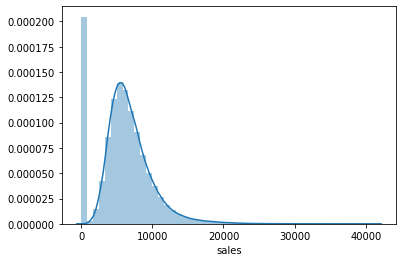

In [33]:
# Distribuição normal (biblioteca Seaborn)

sns.distplot(df1['sales'])

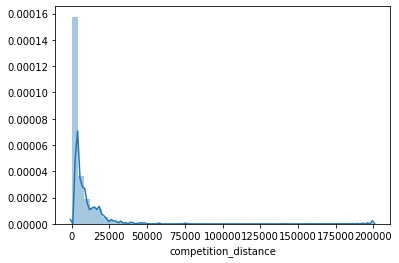

In [34]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorial Attributes

In [37]:
cat_att[['state_holiday','store_type','assortment']].apply(lambda x: x.unique().shape[0])

state_holiday    4
store_type       4
assortment       3
dtype: int64

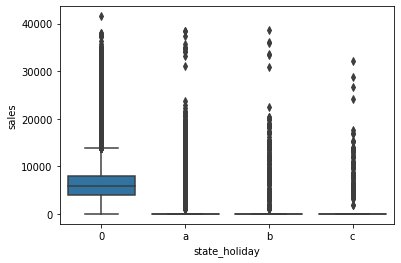

In [38]:
# Gráficos de boxplot

sns.boxplot(x='state_holiday',y='sales',data=df1)

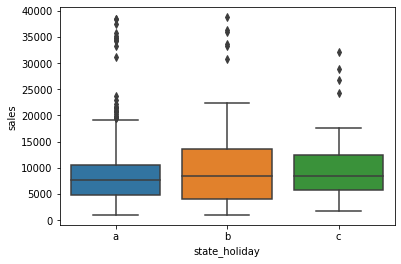

In [40]:
# Removendo os dias em que as lojas estiveram fechadas, para melhorar a visualização

aux1=df1[(df1['state_holiday']!='0')&(df1['sales']>0)]
sns.boxplot(x='state_holiday',y='sales',data=aux1)

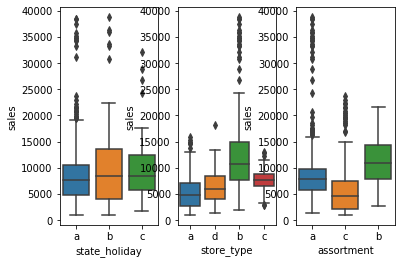

In [44]:
# Plotando para os demais artibutos

aux1=df1[(df1['state_holiday']!='0')&(df1['sales']>0)]

plt.subplot( 1, 3, 1) # os números entre () são linhas, colunas, posição onde ficará o gráfico
sns.boxplot(x='state_holiday',y='sales',data=aux1)

plt.subplot( 1, 3, 2)
sns.boxplot(x='store_type',y='sales',data=aux1)

plt.subplot( 1, 3, 3)
sns.boxplot(x='assortment',y='sales',data=aux1)